<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [3]:
conn

Import pandas module.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',85)
pd.set_option('display.width', 1000)

## Demo: How to run an sql query


In [5]:
df = pd.read_sql("SELECT * FROM master", conn)
df

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,OrgSize,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,FizzBuzz,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,OpSys,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,No,I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,Windows,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",10 to 19 employees,12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Yes,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,MacOS,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,3-5 times per week,They were about the same,None,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,17,11,8,Very satisfied,Very satisfied,None,None,None,I am not interested in new job opportunities,3-4 years ago,Yes,I was preparing for a job search,USD,United States dollar,90000.0,Yearly,90000.0,40.0,All or almost all the time (I'm full-time remote),Home,A little above average,"Yes, because I see value in code review",5.0,"No, but I think we should",Developers and management have nearly equal in...,I have a great deal of influence,Windows,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,Yes,Yes,Twitter,In real life (in person),Username,2011,Multiple times per day,More than 10 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a dev

In [6]:
df.to_csv("m4_survey_data.csv",index=False)

In [7]:
# # print how many rows are there in the table named 'master'
# QUERY = "SELECT *"
# SELECT COUNT(*)
# FROM master
# """

# # the read_sql_query runs the sql query and returns the data as a dataframe
# df = pd.read_sql_query(QUERY,conn)
# df.head()

## Demo: How to list all tables


In [8]:
# # print all the tables names in the database
# QUERY = """
# SELECT name as Table_Name FROM
# sqlite_master WHERE
# type = 'table'
# """
# # the read_sql_query runs the sql query and returns the data as a dataframe
# pd.read_sql_query(QUERY,conn)


## Demo: How to run a group by query


In [9]:
# QUERY = """
# SELECT Age,COUNT(*) as count
# FROM master
# group by age
# order by age
# """
# pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [10]:
# table_name = 'master'  # the table you wish to describe

# QUERY = """
# SELECT sql FROM sqlite_master
# WHERE name= '{}'
# """.format(table_name)

# df = pd.read_sql_query(QUERY,conn)
# print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


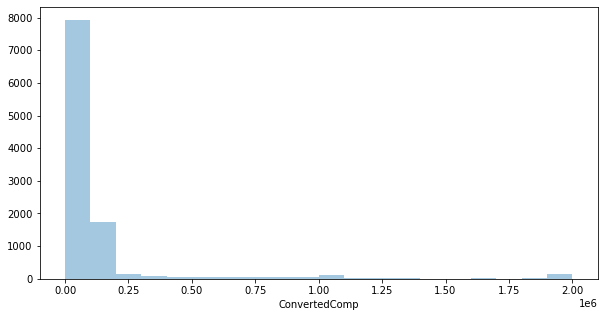

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["ConvertedComp"],bins=20,kde=False)
plt.show()

### Box Plots


Plot a box plot of `Age.`


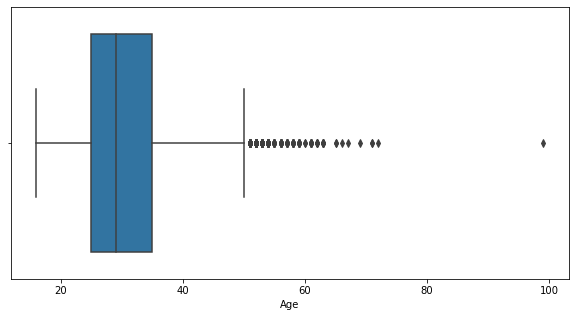

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.Age, data=df)
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


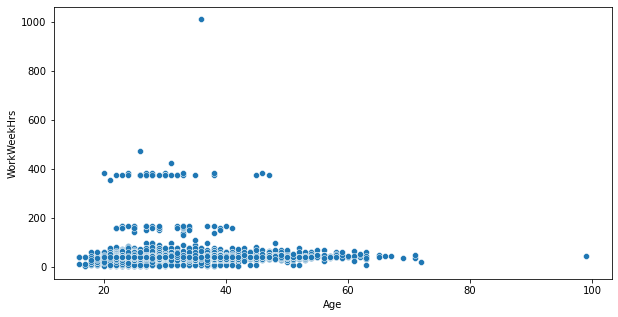

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Age,y=df.WorkWeekHrs, data=df)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


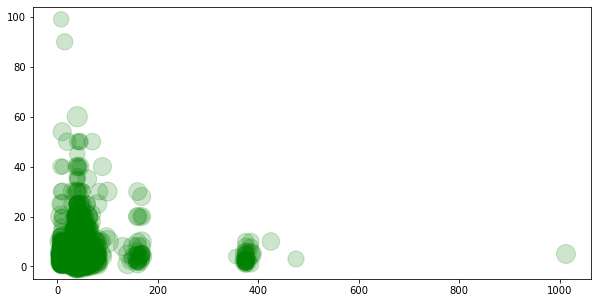

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(x=df.WorkWeekHrs, y=df.CodeRevHrs, c='green', alpha=0.2, s=df.Age*10)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [15]:
df2 = pd.read_csv("M2.csv")

In [16]:
df2.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq',
 

In [17]:
df2["DatabaseDesireNextYear"].value_counts()

Microsoft SQL Server                                             541
PostgreSQL                                                       533
MongoDB                                                          299
MySQL                                                            253
PostgreSQL;Redis                                                 209
                                                                ... 
DynamoDB;MariaDB;MongoDB;PostgreSQL                                1
Couchbase;PostgreSQL;Other(s):                                     1
Cassandra;DynamoDB;MongoDB                                         1
Cassandra;DynamoDB;Elasticsearch;Firebase;MongoDB;MySQL;Redis      1
Firebase;MariaDB;MongoDB;PostgreSQL;SQLite                         1
Name: DatabaseDesireNextYear, Length: 1678, dtype: int64

In [18]:
x = pd.DataFrame(df2["DatabaseDesireNextYear"].value_counts())

In [19]:
x

,DatabaseDesireNextYear
Microsoft SQL Server,541
PostgreSQL,533
MongoDB,299
MySQL,253
PostgreSQL;Redis,209
...,...
DynamoDB;MariaDB;MongoDB;PostgreSQL,1
Couchbase;PostgreSQL;Other(s):,1
Cassandra;DynamoDB;MongoDB,1
Cassandra;DynamoDB;Elasticsearch;Firebase;MongoDB;MySQL;Redis,1


In [20]:
x.index

Index(['Microsoft SQL Server', 'PostgreSQL', 'MongoDB', 'MySQL', 'PostgreSQL;Redis', 'SQLite', 'PostgreSQL;SQLite', 'Elasticsearch;PostgreSQL;Redis', 'Firebase', 'MongoDB;PostgreSQL',
       ...
       'Elasticsearch;MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;Redis;SQLite;Other(s):', 'DynamoDB;Elasticsearch;Firebase;MongoDB;Microsoft SQL Server;MySQL;Oracle;PostgreSQL;Redis;SQLite', 'Cassandra;MongoDB;MySQL;Other(s):', 'Cassandra;Microsoft SQL Server;PostgreSQL;Redis', 'Couchbase;Elasticsearch;MySQL;Redis', 'DynamoDB;MariaDB;MongoDB;PostgreSQL', 'Couchbase;PostgreSQL;Other(s):', 'Cassandra;DynamoDB;MongoDB', 'Cassandra;DynamoDB;Elasticsearch;Firebase;MongoDB;MySQL;Redis', 'Firebase;MariaDB;MongoDB;PostgreSQL;SQLite'], dtype='object', length=1678)

In [21]:
y = x.loc[['Microsoft SQL Server', 'PostgreSQL', 'MongoDB', 'MySQL', 'PostgreSQL;Redis']]

In [22]:
y

,DatabaseDesireNextYear
Microsoft SQL Server,541
PostgreSQL,533
MongoDB,299
MySQL,253
PostgreSQL;Redis,209


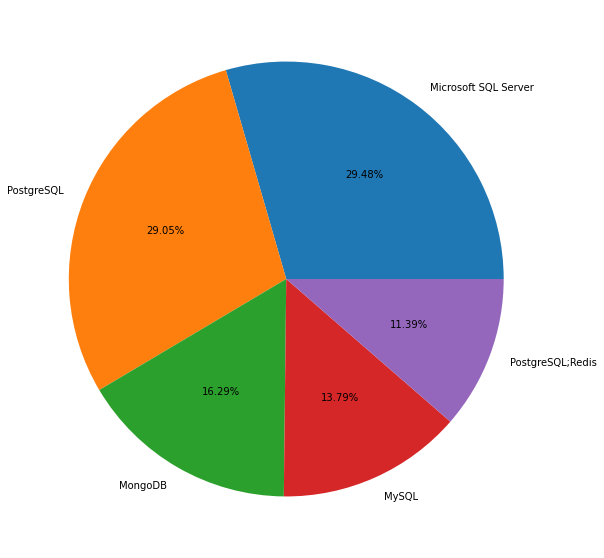

In [23]:
plt.figure(figsize=(10,10))
plt.pie(y.DatabaseDesireNextYear, labels=['Microsoft SQL Server', 'PostgreSQL', 'MongoDB', 'MySQL', 'PostgreSQL;Redis'],
       autopct='%.2f%%')
plt.show()

In [24]:
df2["LanguageDesireNextYear"].value_counts()

C#;HTML/CSS;JavaScript;SQL;TypeScript                                116
Python                                                               111
C#;HTML/CSS;JavaScript;SQL                                            93
HTML/CSS;JavaScript;TypeScript                                        88
HTML/CSS;JavaScript                                                   73
                                                                    ... 
C#;PHP;Other(s):                                                       1
C#;Java;JavaScript;PHP;SQL                                             1
C++;C#;Go;HTML/CSS;JavaScript;Python;Ruby;SQL                          1
Bash/Shell/PowerShell;C#;F#;HTML/CSS;JavaScript;Python;TypeScript      1
Go;Java;JavaScript;Scala;TypeScript                                    1
Name: LanguageDesireNextYear, Length: 6052, dtype: int64

In [25]:
df2["DatabaseWorkedWith"].value_counts()

Microsoft SQL Server                                                                   845
MySQL                                                                                  474
PostgreSQL                                                                             351
Microsoft SQL Server;MySQL                                                             281
SQLite                                                                                 192
                                                                                      ... 
DynamoDB;MariaDB;Microsoft SQL Server;MySQL;SQLite                                       1
Elasticsearch;Oracle;Other(s):                                                           1
DynamoDB;Elasticsearch;Firebase;MongoDB;MySQL;Redis;SQLite                               1
Couchbase;Elasticsearch;MongoDB;Microsoft SQL Server;MySQL;Oracle;PostgreSQL;SQLite      1
DynamoDB;Elasticsearch;MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;Redis;SQLite        1

In [26]:
df2["DatabaseWorkedWith"].count()

10945

In [27]:
df2["DatabaseWorkedWith"].isnull().sum()

453

In [28]:
dww = df2["DatabaseWorkedWith"]

In [29]:
dww

0                              MySQL;SQLite
1                DynamoDB;PostgreSQL;SQLite
2         Couchbase;DynamoDB;Firebase;MySQL
3        MongoDB;Microsoft SQL Server;MySQL
4                        MongoDB;PostgreSQL
                        ...                
11393                  Microsoft SQL Server
11394                                 MySQL
11395                            PostgreSQL
11396            Microsoft SQL Server;Redis
11397                            PostgreSQL
Name: DatabaseWorkedWith, Length: 11398, dtype: object

In [30]:
dww.dropna(inplace=True)

In [31]:
dww.isnull().sum()

0

In [32]:
db = dww == "SQL"

In [33]:
db

0        False
1        False
2        False
3        False
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: DatabaseWorkedWith, Length: 10945, dtype: bool

In [34]:
db2 = dww[dww == "MySQL"]

In [35]:
db2

10       MySQL
61       MySQL
67       MySQL
68       MySQL
90       MySQL
         ...  
11336    MySQL
11340    MySQL
11372    MySQL
11382    MySQL
11394    MySQL
Name: DatabaseWorkedWith, Length: 474, dtype: object

In [36]:
#dww.to_csv("dww.csv",index=False)

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [37]:
df.WorkWeekHrs.median()

40.0

In [38]:
df.CodeRevHrs.median()

4.0

In [39]:
age = df[(df["Age"] >= 30.0) & (df["Age"] <= 35.0)]

In [40]:
age

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,OrgSize,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,FizzBuzz,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,OpSys,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
5,5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",100 to 499 employees,14,13,13,Very dissatisfied,Very satisfied,Very confident,No,No,"I’m not actively looking, but I am open to new...",Less than a year ago,No,"My job status changed (promotion, new job, etc.)",BRL,Brazilian real,9500.0,Monthly,31140.0,8.0,A few days each month,Office,Far above average,"Yes, because I see value in code review",3.0,"Yes, it's part of our process",Developers typically have the most influence o...,I have some influence,MacOS,Not at all,None,No,SIGH,Yes,WhatsApp,In real life (in person),Username,2008,Daily or almost daily,More than 10 times per week,Stack Overflow was much faster,60+ minutes,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,31.0,No,Yes,Too long,Easy
11,11,26,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",12,8,8,Very satisfied,Very satisfied,None,None,None,"I’m not actively looking, but I am open to new...",Less than a year ago,No,I was preparing for a job search,USD,United States dollar,114000.0,Yearly,114000.0,40.0,"Less than half the time, but at least one day ...",Home,Far above average,"Yes, because I see value in code review",2.0,"Yes, it's not part of our process but the deve...",Developers typically have the most influence o...,I have a great deal of influence,MacOS,Not at all,A passing fad,Yes,SIGH,Yes,I don't use social media,In real life (in person),Username,2008,Daily or almost daily,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,34.0,No,No,Appropriate in length,Easy
12,12,29,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",None,"10,000 or more employees",4,20,2,Very satisfied,Slightly satisfied,Very confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Yes,I was preparing for a job search,USD,United States dollar,2000.0,Weekly,100000.0,40.0,"Less than half the time, but at least one day ...",Office,A little above average,"Yes, because I see value in code review",2.0,"No, but I think we should",Developers and management have nearly equal in...,I have little or no influence,MacOS,Implementing cryptocurrency-based products,Useful for immutable record keeping outside of...,Yes,Yes,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,1-2 times per week,Stack Overflow was much faster,0-10 minutes,Yes,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,32.0

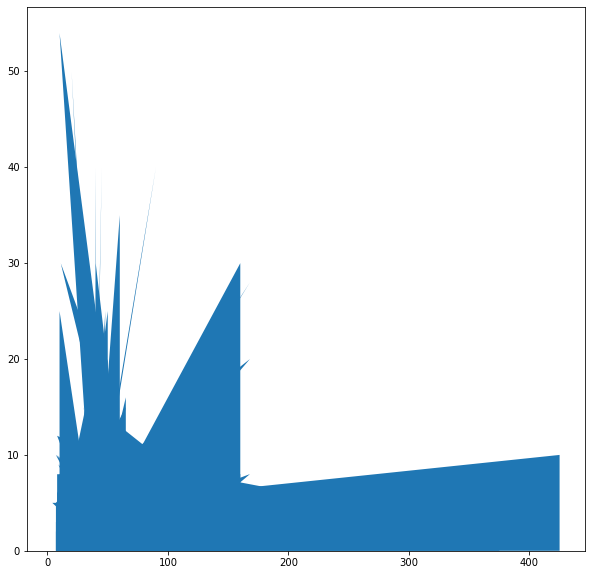

In [41]:
plt.figure(figsize=(10,10))
plt.stackplot(age.WorkWeekHrs, age.CodeRevHrs)
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [42]:
age2 = df[(df["Age"] >= 45.0) & (df["Age"] <= 60.0)]

In [43]:
age2.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,OrgSize,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,FizzBuzz,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,OpSys,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
7,7,22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,None,"10,000 or more employees",35,12,18,Slightly satisfied,Very dissatisfied,Somewhat confident,No,No,"I’m not actively looking, but I am open to new...",More than 4 years ago,No,I had a negative experience or interaction at ...,USD,United States dollar,103000.0,Yearly,103000.0,40.0,"Less than half the time, but at least one day ...",Home,Average,No,NaN,"No, but I think we should","The CTO, CIO, or other management purchase new...",I have little or no influence,Windows,Not at all,None,Yes,Yes,Yes,Instagram,Online,Username,I don't remember,Daily or almost daily,3-5 times per week,Stack Overflow was much faster,0-10 minutes,Yes,A few times per week,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,47.0,No,Yes,Appropriate in length,Easy
50,50,111,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","10,000 or more employees",41,12,35,Very satisfied,Slightly satisfied,Very confident,No,No,"I’m not actively looking, but I am open to new...",More than 4 years ago,No,I was preparing for a job search,USD,United States dollar,NaN,None,NaN,NaN,A few days each month,Home,A little above average,No,NaN,"No, but I think we should","The CTO, CIO, or other management purchase new...",I have little or no influence,Windows,Not at all,An irresponsible use of resources,No,Yes,What?,Twitter,In real life (in person),Username,I don't remember,Multiple times per day,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,A few times per week,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,54.0,No,Yes,Too long,Easy
66,66,144,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed part-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",500 to 999 employees,20,10,20,Neither satisfied nor dissatisfied,Slightly satisfied,Somewhat confident,Yes,No,I am not interested in new job opportunities,More than 4 years ago,No,None,EUR,European Euro,4000.0,Monthly,54996.0,35.0,"More than half, but not all, the time",Home,A little below average,"Yes, because I see value in code review",4.0,"Yes, it's part of our process","The CTO, CIO, or other management purchase new...",I have little or no influence,Windows,Not at all,An irresponsible use of resources,No,Yes,Yes,WhatsApp,In real life (in person),Username,2012,Daily or almost daily,3-5 times per week,Stack Overflow was slightly faster,31-60 minutes,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","No, not really",Somewhat less welcome now than last year,47.0,No,Yes,Too long,Easy
75,75,164,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng

In [44]:
age2.ConvertedComp

7        103000.0
50            NaN
66        54996.0
75        62807.0
93        72522.0
           ...   
11342     76339.0
11345     68705.0
11350    300000.0
11372     87668.0
11373     59652.0
Name: ConvertedComp, Length: 599, dtype: float64

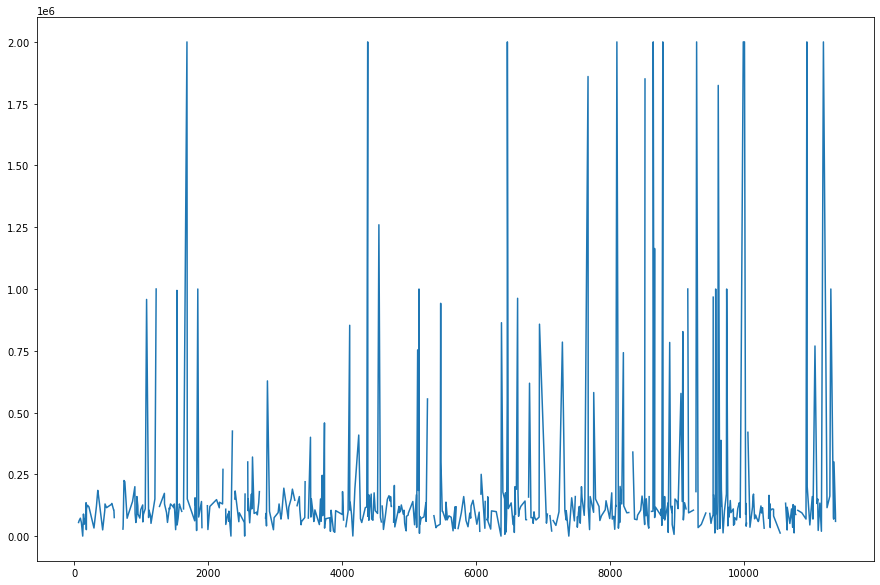

In [45]:
age2.ConvertedComp.plot(figsize=(15,10))
plt.show()

In [46]:
age3 = df[(df["Age"] >= 25.0) & (df["Age"] <= 30.0)]

In [47]:
age3.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,OrgSize,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,FizzBuzz,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,OpSys,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,17,11,8,Very satisfied,Very satisfied,None,None,None,I am not interested in new job opportunities,3-4 years ago,Yes,I was preparing for a job search,USD,United States dollar,90000.0,Yearly,90000.0,40.0,All or almost all the time (I'm full-time remote),Home,A little above average,"Yes, because I see value in code review",5.0,"No, but I think we should",Developers and management have nearly equal in...,I have a great deal of influence,Windows,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,Yes,Yes,Twitter,In real life (in person),Username,2011,Multiple times per day,More than 10 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",None,100 to 499 employees,10,17,3,Very satisfied,Slightly satisfied,Somewhat confident,No,No,"I’m not actively looking, but I am open to new...",3-4 years ago,Yes,I heard about a job opportunity (from a recrui...,GBP,Pound sterling,29000.0,Monthly,455352.0,40.0,A few days each month,Home,Average,No,NaN,"No, but I think we should",Developers and management have nearly equal in...,I have some influence,Windows,Not at all,A passing fad,No,SIGH,No,YouTube,Online,Username,2010,Multiple times per day,Less than once per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,5,18,2,Slightly satisfied,Neither satisfied nor dissatisfied,Somewhat confident,No,No,I am actively looking for a job,Less than a year ago,No,I was preparing for a job search,AUD,Australian dollar,90000.0,Yearly,65277.0,45.0,A few days each month,"Other place, such as a coworking space or cafe",A little above average,"Yes, because I see value in code review",5.0,"Yes, it's part of our process",Developers typically have the most influence o...,I have little or no influence,Linux-based,Not at all,A passing fad,Yes,"Fortunately, someone else has that title",What?,YouTube,In real life (in person),None,2014,Daily or almost daily,6-10 times per week,Stack Overflow was slightly faster,0-10 minutes,Yes,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
16,16,43,I am a developer by pr

In [48]:
age3.corr()

,index,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
index,1.000000,0.999986,-0.006388,-0.009846,-0.020447,0.009425,-0.032681
Respondent,0.999986,1.000000,-0.006372,-0.009896,-0.020417,0.009408,-0.032737
CompTotal,-0.006388,-0.006372,1.000000,-0.038303,0.005858,0.059443,0.009916
ConvertedComp,-0.009846,-0.009896,-0.038303,1.000000,0.013088,-0.047301,0.062712
WorkWeekHrs,-0.020447,-0.020417,0.005858,0.013088,1.000000,0.009816,0.023208
CodeRevHrs,0.009425,0.009408,0.059443,-0.047301,0.009816,1.000000,-0.003608
Age,-0.032681,-0.032737,0.009916,0.062712,0.023208,-0.003608,1.000000


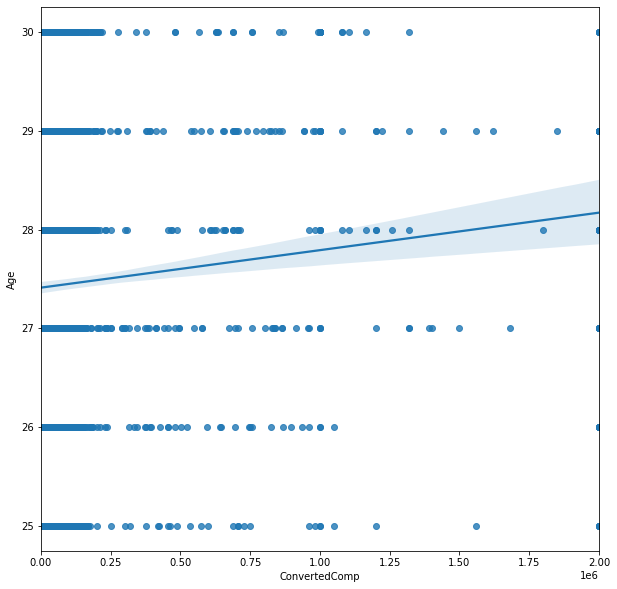

In [49]:
plt.figure(figsize=(10,10))
sns.regplot(x=age3.ConvertedComp,y=age3.Age)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [50]:
df.MainBranch.value_counts()

I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: MainBranch, dtype: int64

In [51]:
z = pd.DataFrame(df.MainBranch.value_counts())

In [52]:
z

,MainBranch
I am a developer by profession,10618
"I am not primarily a developer, but I write code sometimes as part of my work",780


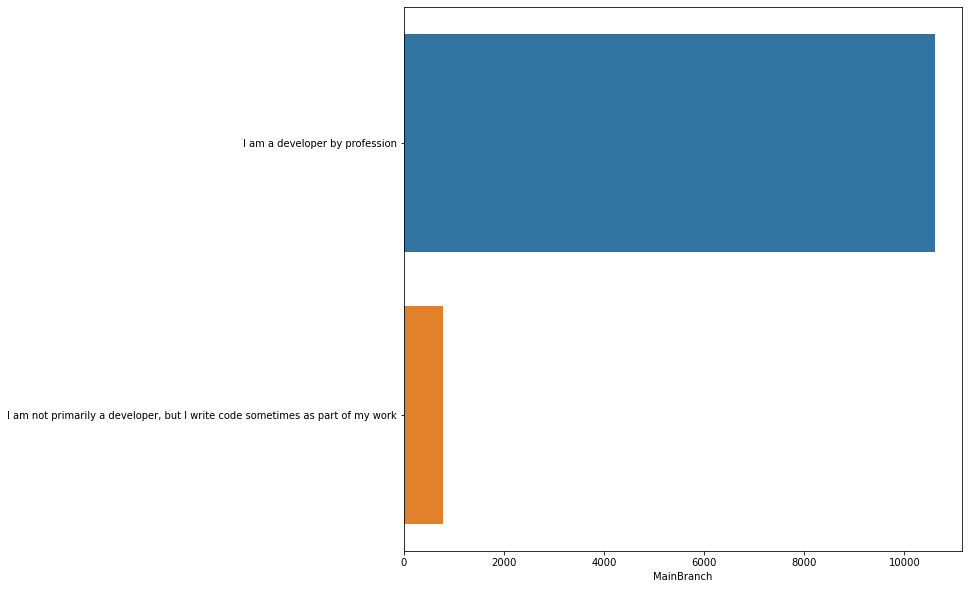

In [53]:
plt.figure(figsize=(10,10))
sns.barplot(x=z.MainBranch,y=z.index, orient='h')
plt.show()

Close the database connection.


In [54]:
conn.close()

In [55]:
df2["DevType"].value_counts()

Developer, full-stack                                                                                                                                                                         1472
Developer, back-end                                                                                                                                                                            752
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                 446
Developer, back-end;Developer, full-stack                                                                                                                                                      405
Developer, front-end                                                                                                                                                                           292
                         

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
